# Exercise 2: Data Processing and Analysis

In [45]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    import otter
    grader = otter.Notebook()
except:
    %pip install otter-grader
    import otter
    grader = otter.Notebook()

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [46]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
smartwatch

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
0,4174.0,58.939776,98.809650,5450.390578,7.167235622316564,Highly Active,1
1,NaN,NaN,98.532195,727.601610,6.538239375570314,Highly_Active,5
2,1860.0,247.803052,97.052954,2826.521994,ERROR,Highly Active,5
3,2294.0,40.000000,96.894213,13797.338044,7.367789630207228,Actve,3
4,2130.0,61.950165,98.583797,15679.067648,NaN,Highly_Active,6
...,...,...,...,...,...,...,...
9995,1524.0,78.819386,98.931927,2948.491953,7.402748595032027,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.3821659358529015,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.91654920303435,Sedentary,4
9998,4907.0,NaN,98.401058,3364.788855,5.691233932149209,Active,8


Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [47]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [48]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = float(smartwatch['Heart Rate (BPM)'].max())

minimumHeartRate, maximumHeartRate, np.float64(40)

(np.float64(40.0), 296.5939695131042, np.float64(40.0))

In [49]:
grader.check('q1')

Question 1 results: All test cases passed!

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [50]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

print(len(outlierHeartRaterows) + len(nullHeartRaterows))

450


In [51]:
print(outlierHeartRaterows)
print(nullHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0        247.803052               97.052954   2826.521994   
337    2369.0        200.491642               95.441773   2998.761919   
393    2443.0        219.199178               95.497181   1227.804688   
403    3200.0        232.944907               96.011492   9402.746140   
595    2129.0        264.467356               97.161853   2555.402184   
649    2008.0        226.256725               98.356789   2739.171166   
818    3156.0        265.542910                     NaN   7281.778831   
1195   3261.0        207.102188               99.652006   2867.872064   
1391   4621.0        207.430243               96.688083  20577.677290   
1602   4737.0        215.194681               95.095839  16072.283561   
2023      NaN        204.067811               99.032130  17620.765455   
2211   2711.0        209.773924               97.852781   1786.998129   
2212   4020.0        228.498078               95.28

In [52]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]

print(heartrateRows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
3      

**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [53]:
HeartRateMean = float(heartrateRows['Heart Rate (BPM)'].mean())
print(HeartRateMean)


75.13268404820141


In [54]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


print(outlierHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0         75.132684               97.052954   2826.521994   
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
649    2008.0         75.132684               98.356789   2739.171166   
818    3156.0         75.132684                     NaN   7281.778831   
1195   3261.0         75.132684               99.652006   2867.872064   
1391   4621.0         75.132684               96.688083  20577.677290   
1602   4737.0         75.132684               95.095839  16072.283561   
2023      NaN         75.132684               99.032130  17620.765455   
2211   2711.0         75.132684               97.852781   1786.998129   
2212   4020.0         75.132684               95.28

/tmp/ipykernel_2347/936369900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean
/tmp/ipykernel_2347/936369900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean


In [55]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows])

fullTableHRMean = float(smartwatch_hr['Heart Rate (BPM)'].mean())
print(fullTableHRMean)

print(smartwatch_hr)

75.13268404820141
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0         75.132684               97.052954   2826.521994   
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
2                     ERROR  Highly Active     

In [56]:
grader.check('q2')

Question 2 results: All test cases passed!

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

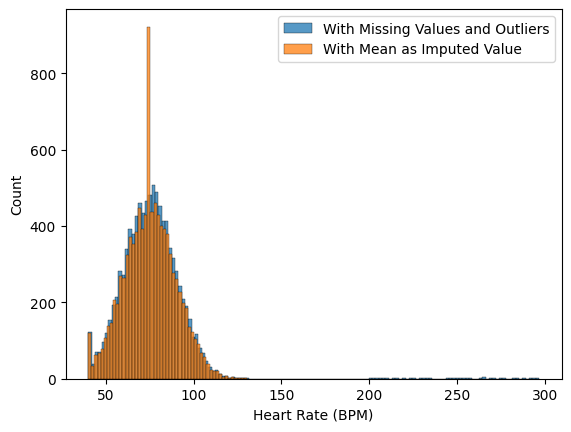

In [57]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: Mean imputation changes the distribution of the values, and therefore impacts the median, but not the mean. Since mean values were imputed for the impossibly high heart rate values in the dataset, the median of the data has decreased. This can be seen, as the median value for the original data was 75.22, and for the mean imputed data 75.13.

...

In [58]:
## coding cell to check the difference in median values 

print(smartwatch['Heart Rate (BPM)'].median())
print(smartwatch_hr['Heart Rate (BPM)'].median())


75.22060125775644
75.13268404820141


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [59]:
minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()

maxBloodO2 = smartwatch['Blood Oxygen Level (%)'].max()

meanBloodO2 = smartwatch['Blood Oxygen Level (%)'].mean()


print(minBloodO2, maxBloodO2, meanBloodO2)

90.79120814564097 100.0 97.84158102099076


In [60]:
grader.check('q4')

Question 4 results: All test cases passed!

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

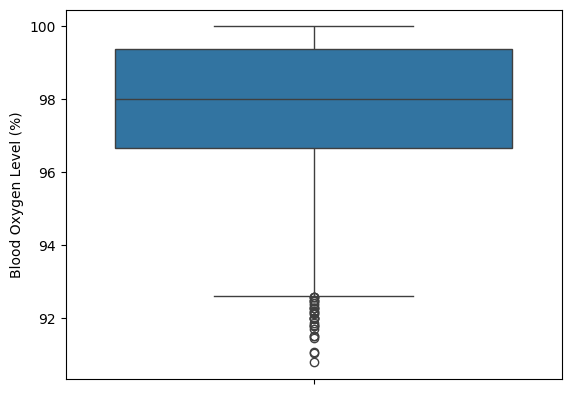

In [61]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: For the Blood Oxygen Level column, I decided not to remove outlier values, and to perform mean imputation on missing values. There are 27 values in the Blood Oxygen Column which fall below 92.5. These values all range from 90.8 to 92.5. While these values are low, and not healthy, they are possible. These values may be reflective of mis-readings of the smartwatch, but it is also possible that they are accurate readings of very low levels. Therefore, these values have been kept. Missing values (300) have been mean imputed in order to avoid deletion of the rows, and to maintain the same mean.



In [62]:
smartwatch_o2 = smartwatch_hr

outlierBlood = smartwatch_o2[smartwatch_o2['Blood Oxygen Level (%)'] < 92.5 ]

nullBloodo2Rows = smartwatch_o2[smartwatch_o2['Blood Oxygen Level (%)'].isnull()]

Bloodo2Rows = smartwatch_o2[(~smartwatch_o2['Blood Oxygen Level (%)'].isnull())]

print(len(nullBloodo2Rows),len(Bloodo2Rows), len(outlierBlood))
      

300 9700 27


In [63]:
## use this space or additional cells to deal with the missing/outlier values. 

nullBloodo2Rows['Blood Oxygen Level (%)'] = meanBloodO2

Bloodo2Rows = smartwatch_o2[(~smartwatch_o2['Blood Oxygen Level (%)'].isnull())]

smartwatch_o2 = pd.concat([nullBloodo2Rows, Bloodo2Rows])

fullTableHo2Mean = (smartwatch_o2['Blood Oxygen Level (%)'].mean())
print(fullTableHo2Mean)

print (smartwatch_o2)


97.84158102099076
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
818    3156.0         75.132684               97.841581   7281.778831   
8369   2283.0         75.132684               97.841581  21495.639335   
1615   1417.0         75.132684               97.841581   1585.892722   
1712   4079.0         75.132684               97.841581  19003.921284   
4690   2829.0         75.132684               97.841581   6610.794796   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
818       4.300171191258864      Sedentary     

/tmp/ipykernel_2347/3516845451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullBloodo2Rows['Blood Oxygen Level (%)'] = meanBloodO2


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [64]:
minSteps = smartwatch['Step Count'].min()

maxSteps = smartwatch['Step Count'].max()

meanSteps = smartwatch['Step Count'].mean()

print(minSteps, maxSteps, meanSteps)

0.9101380609604088 62486.690753464914 6985.685884992229


In [65]:
grader.check('q6')

Question 6 results: All test cases passed!

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: I have chosen to mean impute for null values (100) in the step count column. This deals with missing data without deleting other information in the rows. No outliers have been altered, as while the minimum (0.9 steps) and the maximum (62,486 steps) are extremes, they could be reflective of individuals who are perhaps confined to a bed, or perhaps training for very long distance activity. 

....

In [66]:
## use this space or additional cells to address the missing or outlier data. 

smartwatch_steps = smartwatch_o2
nullSteps = smartwatch_steps[smartwatch_steps['Step Count'].isnull()]

StepRows = smartwatch_steps[(~smartwatch_steps['Step Count'].isnull())]

print(len(nullSteps), len(StepRows))

nullSteps['Step Count'] = meanSteps
StepRows = smartwatch_steps[(~smartwatch_steps['Step Count'].isnull())]

smartwatch_steps = pd.concat([nullSteps, StepRows])

fullTablestepMean = (smartwatch_steps['Step Count'].mean())
print(fullTablestepMean)

print(smartwatch_steps)

100 9900
6985.685884992228
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
1509   4719.0        107.126196               97.841581   6985.685885   
5870   1499.0         75.132684               96.833301   6985.685885   
204    2923.0         75.132684               98.710637   6985.685885   
841    4301.0         75.132684               98.267833   6985.685885   
2798   4923.0         75.132684              100.000000   6985.685885   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
1509       7.21392401415147      Seden

/tmp/ipykernel_2347/4285719129.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSteps['Step Count'] = meanSteps


Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [67]:
#minSleep = smartwatch['Sleep Duration (hours)'].min()

#minSleep

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [68]:
for hours in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(hours)  ## first try to see if it can be converted to a number
    except:
        print(hours)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [69]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
errorTable

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
8642,3476.0,75.132684,99.462778,6985.685885,ERROR,Active,3
1456,2997.0,54.116580,95.631824,6985.685885,ERROR,Active,1
4349,2677.0,73.357223,95.335209,6985.685885,ERROR,Sedentary,1
6992,2105.0,97.477048,94.138582,6985.685885,ERROR,Seddentary,7
711,2066.0,64.843081,97.841581,12722.224091,ERROR,Seddentary,7
...,...,...,...,...,...,...,...
9901,2269.0,63.369107,96.229029,6656.786482,ERROR,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,ERROR,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,ERROR,Active,1
9943,2961.0,91.834863,96.145378,38831.465057,ERROR,Active,4


Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [70]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_2347/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
8642,3476.0,75.132684,99.462778,6985.685885,NaN,Active,3
1456,2997.0,54.116580,95.631824,6985.685885,NaN,Active,1
4349,2677.0,73.357223,95.335209,6985.685885,NaN,Sedentary,1
6992,2105.0,97.477048,94.138582,6985.685885,NaN,Seddentary,7
711,2066.0,64.843081,97.841581,12722.224091,NaN,Seddentary,7
...,...,...,...,...,...,...,...
9901,2269.0,63.369107,96.229029,6656.786482,NaN,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,NaN,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,NaN,Active,1
9943,2961.0,91.834863,96.145378,38831.465057,NaN,Active,4


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [71]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
1509,4719.0,107.126196,97.841581,6985.685885,7.213924,Sedentary,2
5870,1499.0,75.132684,96.833301,6985.685885,7.221605,Sedentary,9
204,2923.0,75.132684,98.710637,6985.685885,5.756959,Highly_Active,8
841,4301.0,75.132684,98.267833,6985.685885,3.113738,Highly_Active,1
2798,4923.0,75.132684,100.000000,6985.685885,5.880595,Sedentary,2
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.623070,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.492060,6.916549,Sedentary,4


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [72]:
minSleep = smartwatch_sleep['Sleep Duration (hours)'].min()

maxSleep = smartwatch_sleep['Sleep Duration (hours)'].max()

meanSleep = smartwatch_sleep['Sleep Duration (hours)'].mean()

minSleep, maxSleep, meanSleep

(np.float64(-0.1944527906201543),
 np.float64(12.140232872862926),
 np.float64(6.505462918406444))

In [73]:
grader.check('q8')

Question 8 results: All test cases passed!

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: For the sleep column, I have chosen to mean impute for all missing values, and for the one value below zero. It is not possible to get negative sleep, so that value has been altered. It is possible, though, to go 24 hours with no sleep, so no further values have been changed. 


In [74]:
nullsleep = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'].isnull()]
outliersleep = smartwatch_sleep[smartwatch_sleep['Sleep Duration (hours)'] < 0]

print(len(nullsleep), len(outliersleep))

397 1


In [75]:
## use this space or additional cells to address the missing or outlier data. 
smartwatch_updated_sleep = smartwatch_sleep

nullsleep = smartwatch_updated_sleep[smartwatch_updated_sleep['Sleep Duration (hours)'].isnull()]
outliersleep = smartwatch_updated_sleep[smartwatch_updated_sleep['Sleep Duration (hours)'] < 0]

nullsleep['Sleep Duration (hours)'] = meanSleep
outliersleep['Sleep Duration (hours)'] = meanSleep

sleepRows = smartwatch_updated_sleep[(~smartwatch_updated_sleep['Sleep Duration (hours)'].isnull()) & (smartwatch_updated_sleep['Sleep Duration (hours)'] >= 0)]

smartwatch_updated_sleep = pd.concat([outliersleep, nullsleep, sleepRows])

fullTablesleepMean = (smartwatch_updated_sleep['Sleep Duration (hours)'].mean())
print(fullTablesleepMean)
print(smartwatch_updated_sleep)

6.506132909977347
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
3366   1608.0         78.832837              100.000000   7122.866517   
8642   3476.0         75.132684               99.462778   6985.685885   
1456   2997.0         54.116580               95.631824   6985.685885   
4349   2677.0         73.357223               95.335209   6985.685885   
5177   2997.0         70.484333               97.615592   6985.685885   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

      Sleep Duration (hours) Activity Level Stress Level  
3366                6.505463      Sedentary   

/tmp/ipykernel_2347/1010596254.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullsleep['Sleep Duration (hours)'] = meanSleep
/tmp/ipykernel_2347/1010596254.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliersleep['Sleep Duration (hours)'] = meanSleep


We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [76]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

Very High
nan


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: For the 'Very High' value, I decided to replace the strings with the max value of the dataset. This preserves the meaning of the 'Very High' string, and therefore raises the mean of the dataset. It would seem inapprpriate to delate these values, as this would decrease variability in the data, or to mean impute, as this would not reflect the 'Very High' values.


In [77]:
#dealing with Very High value

smartwatch_stress = smartwatch_updated_sleep

HighTable = smartwatch_stress[smartwatch_stress['Stress Level'] == 'Very High']
StressRows = smartwatch_stress[(smartwatch_stress['Stress Level'] != 'Very High') & (~smartwatch_stress['Stress Level'].isnull())]
nullstress = smartwatch_stress[smartwatch_stress['Stress Level'].isnull()]

maxstress = StressRows['Stress Level'].max()
HighTable['Stress Level'] = maxstress

smartwatch_stress = pd.concat([StressRows, HighTable, nullstress])
print(smartwatch_stress)


      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
3366   1608.0         78.832837              100.000000   7122.866517   
8642   3476.0         75.132684               99.462778   6985.685885   
1456   2997.0         54.116580               95.631824   6985.685885   
4349   2677.0         73.357223               95.335209   6985.685885   
5177   2997.0         70.484333               97.615592   6985.685885   
...       ...               ...                     ...           ...   
9576   3043.0         84.579910               96.057166   8843.368567   
9747   2206.0         52.967772               99.168017   5499.206797   
9769   2269.0         90.464655               97.377102    266.147855   
9826   3569.0         55.151993               99.312648     40.324128   
9873   3259.0         43.889444               95.345083  12980.404669   

      Sleep Duration (hours) Activity Level Stress Level  
3366                6.505463      Sedentary           10  
8642 

/tmp/ipykernel_2347/3772854464.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HighTable['Stress Level'] = maxstress


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [78]:
smartwatch['Activity Level'].unique()

array(['Highly Active', 'Highly_Active', 'Actve', 'Seddentary',
       'Sedentary', 'Active', nan], dtype=object)

**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`



In [79]:
## Highly Active 

highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly_Active') | (smartwatch_stress['Activity Level'] == 'Highly Active')]  ## Pull out rows for two unique values matching highly active
#highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
highlyActive.loc[:,'Activity Level'] = 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 

## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Actve') | (smartwatch_stress['Activity Level'] == 'Active')]  ## Pull out rows for two unique values matching active
active['Activity Level'] = 'Active'  ## Reset the text in the column to Active
active['NumActivity'] = 2 ## set the number for the numerical value 

## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Seddentary') | (smartwatch_stress['Activity Level'] == 'Sedentary')]  ## Pull out rows for two unique values matching sedentary
sedentary['Activity Level'] = 'Sedentary'  ## Reset the text in the column to sedentary
sedentary['NumActivity'] = 3 ## set the number for the numerical value

final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
final_table


/tmp/ipykernel_2347/2716100669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_2347/2716100669.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active['Activity Level'] = 'Active'  ## Reset the text in the column to Active
/tmp/ipykernel_2347/2716100669.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level,NumActivity
1009,1223.0,84.954371,97.841581,3505.081399,6.505463,Highly Active,8,1.0
1335,1193.0,57.231545,97.841581,2184.899471,6.505463,Highly Active,5,1.0
2,1860.0,75.132684,97.052954,2826.521994,6.505463,Highly Active,5,1.0
9438,4411.0,75.132684,99.524016,11209.020829,6.505463,Highly Active,3,1.0
1262,4465.0,75.132684,97.113032,51.448103,6.505463,Highly Active,6,1.0
...,...,...,...,...,...,...,...,...
9898,1409.0,79.941705,98.716816,619.353083,8.143443,NaN,8,NaN
9991,4289.0,91.381582,95.741838,3930.126338,5.804083,NaN,8,NaN
1909,4005.0,70.466514,99.406450,29024.172293,4.067177,NaN,NaN,NaN
2360,1515.0,61.019726,96.624562,1540.652218,6.780781,NaN,NaN,NaN


Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [80]:
final_table.isnull().sum()

User ID                   201
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)      0
Activity Level            200
Stress Level              200
NumActivity               200
dtype: int64

Then let's use the info function to make sure each column has the data type we're expecting. 

In [81]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1009 to 5673
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 9799 non-null   float64
 1   Heart Rate (BPM)        10000 non-null  float64
 2   Blood Oxygen Level (%)  10000 non-null  float64
 3   Step Count              10000 non-null  float64
 4   Sleep Duration (hours)  10000 non-null  float64
 5   Activity Level          9800 non-null   object 
 6   Stress Level            9800 non-null   object 
 7   NumActivity             9800 non-null   float64
dtypes: float64(6), object(2)
memory usage: 703.1+ KB


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER: I have decided to plot heart rate on the x-axis, and step count on the y-axis. The plot produced does not seem to accurately reflect expectations of a heart rate/step count relationship. I would expect heart rate to increase with greater step count, growing along with physical activity. This graph does not show this expected outcome, and instead appears to show a normal distribution, with step count the highest for individuals with a heart rate around 70-90, and lower for heart rates above and below those values. A spike of values can be seen around heart rate's mean, 75, as I performed mean imputation on null values for that column. 

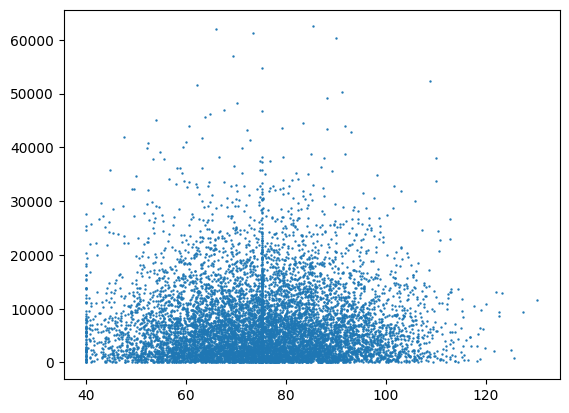

In [82]:
plt.scatter((final_table['Heart Rate (BPM)']), (final_table['Step Count']), s=0.5)

**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER: The visualization for the table with all the NaN values shows a mostly similar distribution to the table with the imputed values. The main difference is the absence of a spike at the mean, where mean imputation created additional values in the previous figure. 


In [83]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

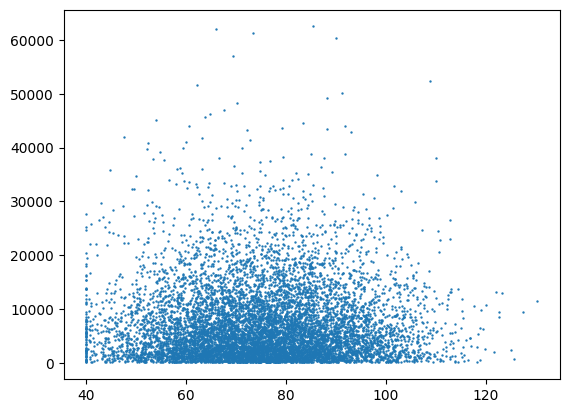

In [87]:
plt.scatter((nanTable['Heart Rate (BPM)']), (nanTable['Step Count']), s=0.5)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<Axes: xlabel='Activity Level', ylabel='Step Count'>

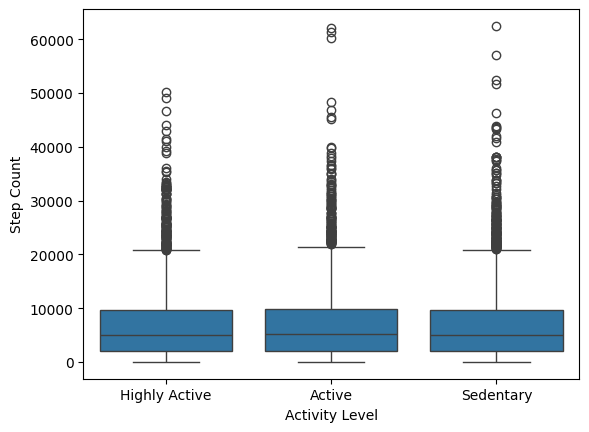

In [85]:
## Visualization 

sns.boxplot(x = (final_table['Activity Level']), y = (final_table['Step Count']))


In [86]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = final_table[(final_table['Activity Level'] == 'Sedentary')]  ## sedentary rows
act = final_table[(final_table['Activity Level'] == 'Active')] ## active rows
hact = final_table[(final_table['Activity Level'] == 'Highly Active')] ## highly active rows 

stat, pval = f_oneway(sed['Step Count'], act['Step Count'], hact['Step Count'])


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.155, p-value: 0.857


Is there significant difference between the groups' step counts?  

ANSWER: No, there is no significant difference between the group's step counts. The ANOVA test also shows us that the result is not statistically significant.


**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER: In order to represent a dataset like this effectively when reporting findings, it would be important to be transparent, and to carefully consider visualization and communication choices. This process would include explaining data cleaning choices, such as which outliers may have been removed and why. To take an example from this data, it would be important to explain that the data showed heart rate values over 200, which were mean imputed due to the impossibly high numbers. It would also be valuable to look more closely for potential biases, seeing perhaps if other variables outside the scope of this dataset could have an impact on heart rate. This would include considering patterns in the outliers, to see if they reflected random smartwatch failures, or if they showed a greater pattern. These possible biases or limitations, for all variables and for the dataset as a whole, should be clearly stated in the presentation of data. In presenting findings, it is also crucial to be clear in how the research was performed, what methodology was used, and how the sample size was formed. This would allow a broader audience to be able to explore the dataset for themselves, and understand the context the data was produced in. Any kind of communication would also have to present all the data, and not only the segments that supported key findings. And, when creating visualizations, data should be presented clearly, without misleading titles or scales. This would require thought during the process of data visualization, in order to consider how the data could be misleading if handled incorrectly. 

